Extreme Gradient Boost
[0.0333054  0.04114445 0.64903384 0.2765163 ]


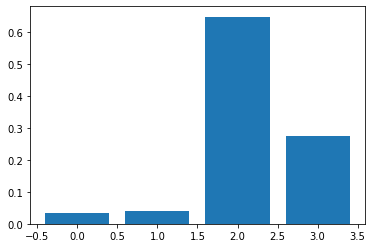

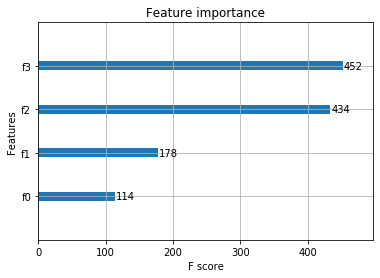

오차 행렬

[[11  0  0]
 [ 0 11  1]
 [ 0  2 13]]

정답률 :  0.9210526315789473


In [12]:
import pandas as pd
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

csv = pd.read_csv('iris.csv')
x = csv.iloc[:,1:5]
y = csv.iloc[:,5]
train_data, test_data, train_label, test_label = train_test_split(x,y)


def eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    print("오차 행렬\n")
    print(confusion)
    print("\n정답률 : ", accuracy)

xg_model = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xg_model.fit(train_data.values,train_label.values)
xg_pred = xg_model.predict(test_data.values)

print("Extreme Gradient Boost")
print(xg_model.feature_importances_)
pyplot.bar(range(len(xg_model.feature_importances_)), xg_model.feature_importances_)
pyplot.show()
plot_importance(xg_model)
pyplot.show()
eval(test_label.values,xg_pred)